In [1]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

C:\Users\AMB\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
faces

{'data': array([[138.        , 135.66667   , 127.666664  , ...,   1.6666666 ,
           1.6666666 ,   0.33333334],
        [ 71.333336  ,  56.        ,  67.666664  , ..., 247.66667   ,
         243.        , 238.33333   ],
        [ 84.333336  ,  97.333336  ,  72.333336  , ..., 114.        ,
         194.33333   , 241.        ],
        ...,
        [ 29.333334  ,  29.        ,  29.333334  , ..., 145.        ,
         147.        , 141.66667   ],
        [ 49.333332  ,  55.666668  ,  76.666664  , ..., 186.33333   ,
         176.33333   , 161.        ],
        [ 31.        ,  26.333334  ,  28.        , ...,  34.        ,
          42.        ,  69.666664  ]], dtype=float32),
 'images': array([[[138.        , 135.66667   , 127.666664  , ...,  69.        ,
           68.333336  ,  67.333336  ],
         [146.        , 139.33333   , 125.        , ...,  68.333336  ,
           67.666664  ,  67.333336  ],
         [150.        , 138.33333   , 124.333336  , ...,  68.333336  ,
           67

In [3]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [ ]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [4]:
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [7]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
random_state=42)

In [9]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

In [12]:
grid.fit(Xtrain, ytrain)
print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.001}


In [13]:
model = grid.best_estimator_

In [15]:
yfit = model.predict(Xtest)

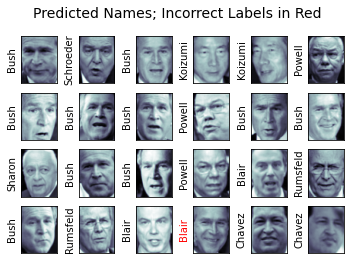

In [31]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
    color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [32]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(ytest, yfit,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



In [35]:
from sklearn.metrics import confusion_matrix

In [43]:
mat = confusion_matrix(ytest, yfit)
mat

array([[ 11,   1,   2,   1,   0,   0,   0,   0],
       [  2,  59,   2,   3,   0,   0,   0,   2],
       [  1,   2,  26,   1,   0,   0,   0,   1],
       [  2,  11,   3, 105,   2,   1,   0,   2],
       [  0,   0,   1,   1,  19,   0,   1,   1],
       [  1,   1,   0,   2,   1,  14,   0,   1],
       [  0,   0,   0,   0,   0,   0,  12,   0],
       [  0,   0,   1,   1,   0,   0,   0,  40]], dtype=int64)

In [39]:
import seaborn as sns

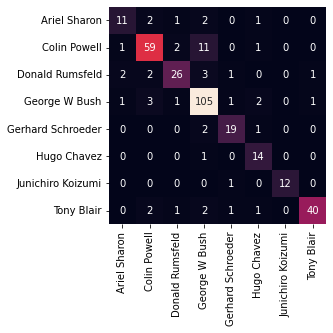

In [46]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=faces.target_names,
yticklabels=faces.target_names);